In [3]:
# check prophet version

import fbprophet
# print version number
print('Prophet %s' % fbprophet.__version__)

Prophet 0.7.1


In [4]:
# load the car sales dataset
#from pandas import read_csv
import pandas as pd
# load data
#path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-car-sales.csv'
#df = read_csv(path, header=0)

df=pd.read_excel('Total_final.xlsx', index_col='TS', parse_dates=True, dtype={'Value':float})
df.drop(['Unnamed: 0','Unnamed: 0.1', 'Time', 'Max Value','Date'], axis=1, inplace=True)
# summarize shape
print(df.shape)
# show first few rows
print(df.head())

(33503, 1)
                     Value
TS                        
2019-10-01 00:15:00  830.4
2019-10-01 00:30:00  821.7
2019-10-01 00:45:00  821.1
2019-10-01 01:00:00  825.0
2019-10-01 01:15:00  819.0


In [3]:
print(df.tail())

                     Value
TS                        
2020-09-13 22:45:00  769.8
2020-09-13 23:00:00  771.3
2020-09-13 23:15:00  769.8
2020-09-13 23:30:00  767.1
2020-09-13 23:45:00  765.6


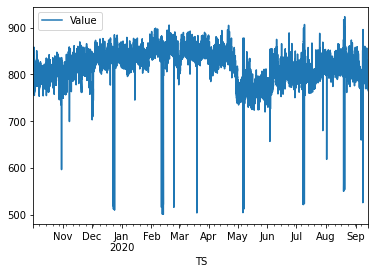

In [4]:
from matplotlib import pyplot

df.plot()
pyplot.show()

In [5]:
'''
# load and plot the car sales dataset
from pandas import read_csv
from matplotlib import pyplot
# load data
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-car-sales.csv'
df = read_csv(path, header=0)
# plot the time series
df.plot()
pyplot.show()
'''

"\n# load and plot the car sales dataset\nfrom pandas import read_csv\nfrom matplotlib import pyplot\n# load data\npath = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-car-sales.csv'\ndf = read_csv(path, header=0)\n# plot the time series\ndf.plot()\npyplot.show()\n"

In [6]:
df_day=df.resample(rule='1H').sum()
df_day=df_day.reset_index()
#df_day.columns
df_day.rename(columns={'TS':'ds','Value':'y'},inplace=True)

In [7]:
df_day.head()

,ds,y
0,2019-10-01 00:00:00,2473.2
1,2019-10-01 01:00:00,3285.0
2,2019-10-01 02:00:00,3288.3
3,2019-10-01 03:00:00,3294.3
4,2019-10-01 04:00:00,3294.3


In [8]:
df_day.tail()

,ds,y
8371,2020-09-13 19:00:00,3154.8
8372,2020-09-13 20:00:00,3122.4
8373,2020-09-13 21:00:00,3131.7
8374,2020-09-13 22:00:00,3118.8
8375,2020-09-13 23:00:00,3073.8


In [9]:
df_day.describe()

,y
count,8376.000000
mean,3264.380158
std,133.501995
min,2054.700000
25%,3188.400000
50%,3280.200000
75%,3358.800000
max,3661.200000


In [10]:
df_day=df.resample(rule='D').sum()
df_day=df_day.reset_index()
#df_day.columns
df_day.rename(columns={'TS':'ds','Value':'y'},inplace=True)

In [11]:
df_day.tail()

,ds,y
344,2020-09-09,77844.9
345,2020-09-10,78377.4
346,2020-09-11,76560.6
347,2020-09-12,76635.9
348,2020-09-13,75723.9


In [12]:
from fbprophet import Prophet
from pandas import to_datetime
'''
# fit prophet model on the car sales dataset
from pandas import read_csv

from fbprophet import Prophet
# load data
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-car-sales.csv'
df = read_csv(path, header=0)
'''
# prepare expected column names
df_day.columns = ['ds', 'y']
df_day['ds']= to_datetime(df_day['ds'])
# define the model
model = Prophet()
# fit the model
model.fit(df_day)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\user\anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
Initial log joint probability = -4.39613
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes
      99       270.121    0.00413718       75.7289           1           1      120
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes
     179       270.265    0.00019681       84.1622   2.169e-06       0.001      273  LS failed, Hessian reset
     199       270.283   1.38947e-05       87.8642      0.3402           1      299
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes
     240       270.296    1.6343e-05       89.9117   1.953e-07       0.001      381  LS failed, Hessian reset
     299         270.3   4.73573e-08       74.9719      0.3914           1      455
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes
     300         270.3   8.25604e-09       74.4478      0.3522      0.3522      456
Optimization terminated normally:
  Convergence detected: absolute parameter change was below tolerance

In [13]:
'''# make an in-sample forecast
from pandas import read_csv
from pandas import to_datetime
from pandas import DataFrame
from fbprophet import Prophet
from matplotlib import pyplot
# load data
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-car-sales.csv'
df = read_csv(path, header=0)
# prepare expected column names
df.columns = ['ds', 'y']
df['ds']= to_datetime(df['ds'])
# define the model
model = Prophet()
# fit the model
model.fit(df)
'''
# define the period for which we want a prediction


"# make an in-sample forecast\nfrom pandas import read_csv\nfrom pandas import to_datetime\nfrom pandas import DataFrame\nfrom fbprophet import Prophet\nfrom matplotlib import pyplot\n# load data\npath = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-car-sales.csv'\ndf = read_csv(path, header=0)\n# prepare expected column names\ndf.columns = ['ds', 'y']\ndf['ds']= to_datetime(df['ds'])\n# define the model\nmodel = Prophet()\n# fit the model\nmodel.fit(df)\n"

          ds          yhat    yhat_lower    yhat_upper
0 2020-09-14  78105.440096  76248.512682  79962.520628
1 2020-09-15  78357.991175  76515.759083  80095.879606
2 2020-09-16  78482.765054  76818.831317  80175.778565
3 2020-09-17  78465.547146  76662.870091  80294.422775
4 2020-09-18  78365.542714  76582.091315  80127.942326


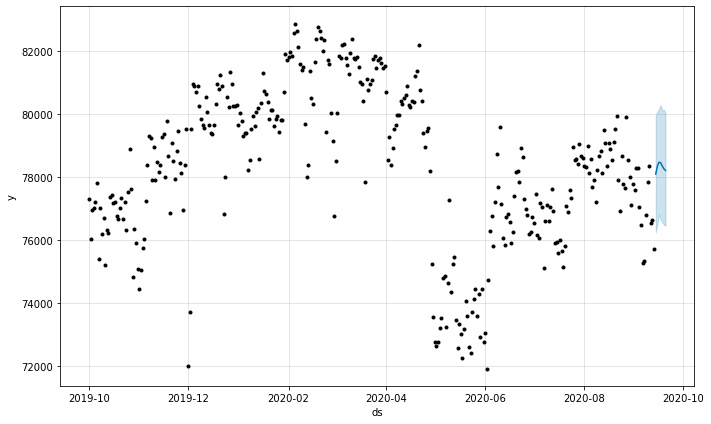

In [14]:
from pandas import DataFrame

future = list()
for i in range(14, 21):
	date = '2020-09-%02d' % i
	future.append([date])
future = DataFrame(future)
future.columns = ['ds']
future['ds']= to_datetime(future['ds'])
# use the model to make a forecast
forecast = model.predict(future)
# summarize the forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())
# plot forecast
model.plot(forecast)
pyplot.show()

In [15]:
'''
# make an out-of-sample forecast
from pandas import read_csv
from pandas import to_datetime
from pandas import DataFrame
from fbprophet import Prophet
from matplotlib import pyplot
# load data
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-car-sales.csv'
df = read_csv(path, header=0)
# prepare expected column names
df.columns = ['ds', 'y']
df['ds']= to_datetime(df['ds'])
# define the model
model = Prophet()
# fit the model
model.fit(df)
# define the period for which we want a prediction
future = list()
for i in range(1, 13):
	date = '1969-%02d' % i
	future.append([date])
future = DataFrame(future)
future.columns = ['ds']
future['ds']= to_datetime(future['ds'])
# use the model to make a forecast
forecast = model.predict(future)
# summarize the forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())
# plot forecast
model.plot(forecast)
pyplot.show()
'''

"\n# make an out-of-sample forecast\nfrom pandas import read_csv\nfrom pandas import to_datetime\nfrom pandas import DataFrame\nfrom fbprophet import Prophet\nfrom matplotlib import pyplot\n# load data\npath = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-car-sales.csv'\ndf = read_csv(path, header=0)\n# prepare expected column names\ndf.columns = ['ds', 'y']\ndf['ds']= to_datetime(df['ds'])\n# define the model\nmodel = Prophet()\n# fit the model\nmodel.fit(df)\n# define the period for which we want a prediction\nfuture = list()\nfor i in range(1, 13):\n\tdate = '1969-%02d' % i\n\tfuture.append([date])\nfuture = DataFrame(future)\nfuture.columns = ['ds']\nfuture['ds']= to_datetime(future['ds'])\n# use the model to make a forecast\nforecast = model.predict(future)\n# summarize the forecast\nprint(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())\n# plot forecast\nmodel.plot(forecast)\npyplot.show()\n"

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


            ds        y
337 2020-09-02  78311.7
338 2020-09-03  78285.3
339 2020-09-04  77065.2
340 2020-09-05  76483.2
341 2020-09-06  75274.2


C:\Users\user\anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


MAE: 2173.327


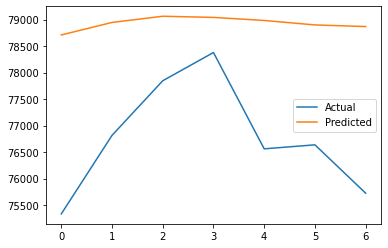

In [16]:
# evaluate prophet time series forecasting model on hold out dataset
from pandas import read_csv
from pandas import to_datetime
from pandas import DataFrame
from fbprophet import Prophet
from sklearn.metrics import mean_absolute_error
from matplotlib import pyplot
# load data
#path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-car-sales.csv'
#df = read_csv(path, header=0)
# prepare expected column names
#df.columns = ['ds', 'y']
#df['ds']= to_datetime(df['ds'])
# create test dataset, remove last 12 months
train = df_day.drop(df_day.index[-7:])
print(train.tail())
# define the model
model = Prophet()
# fit the model
model.fit(train)
# define the period for which we want a prediction
future = list()
for i in range(14, 21):
	date = '2020-09-%02d' % i
	future.append([date])
future = DataFrame(future)
future.columns = ['ds']
future['ds'] = to_datetime(future['ds'])
# use the model to make a forecast
forecast = model.predict(future)
# calculate MAE between expected and predicted values for december
y_true = df_day['y'][-7:].values
y_pred = forecast['yhat'].values
mae = mean_absolute_error(y_true, y_pred)
print('MAE: %.3f' % mae)
# plot expected vs actual
pyplot.plot(y_true, label='Actual')
pyplot.plot(y_pred, label='Predicted')
pyplot.legend()
pyplot.show()

In [17]:
future

,ds
0,2020-09-14
1,2020-09-15
2,2020-09-16
3,2020-09-17
4,2020-09-18
5,2020-09-19
6,2020-09-20


In [18]:
y_true

array([75332.7, 76814.4, 77844.9, 78377.4, 76560.6, 76635.9, 75723.9])

In [19]:
forecast.yhat

0    78708.922137
1    78944.985207
2    79061.811747
3    79040.127249
4    78982.079131
5    78897.762871
6    78867.398477
Name: yhat, dtype: float64

In [20]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-09-14,78850.291750,77059.713359,80435.598287,78792.311391,78919.139082,-141.369614,-141.369614,-141.369614,-141.369614,-141.369614,-141.369614,0.0,0.0,0.0,78708.922137
1,2020-09-15,78876.531968,77164.796508,80816.321037,78798.766713,78968.913501,68.453240,68.453240,68.453240,68.453240,68.453240,68.453240,0.0,0.0,0.0,78944.985207
2,2020-09-16,78902.772185,77322.665153,80781.163136,78803.389821,79017.432885,159.039562,159.039562,159.039562,159.039562,159.039562,159.039562,0.0,0.0,0.0,79061.811747
3,2020-09-17,78929.012403,77132.447780,80734.022236,78807.955239,79068.878365,111.114847,111.114847,111.114847,111.114847,111.114847,111.114847,0.0,0.0,0.0,79040.127249
4,2020-09-18,78955.252620,77288.408463,80786.276511,78810.375923,79121.521114,26.826511,26.826511,26.826511,26.826511,26.826511,26.826511,0.0,0.0,0.0,78982.079131
5,2020-09-19,78981.492838,77088.307475,80600.555895,78813.666065,79173.103410,-83.729966,-83.729966,-83.729966,-83.729966,-83.729966,-83.729966,0.0,0.0,0.0,78897.762871
6,2020-09-20,79007.733055,77073.936407,80760.863213,78819.276186,79228.868400,-140.334578,-140.334578,-140.334578,-140.334578,-140.334578,-140.334578,0.0,0.0,0.0,78867.398477
